# Deep Learning


---



The following code performs: 

1.   Exploratory Data Analysis on the MNIST Fashion Dataset
1.   Preparation of Dataset for a Convolutional Neural Network
1.   Training a CNN with the MNIST Dataset
2.   Predicting the outcome on new Dataitems or Datasets


In [0]:
from google.colab import drive
drive.mount('/content/drive')

## Exploratory Data Analysis





**Introduction**

This stage involves breaking down the training set in order to understand what it represents.

EDA considers the following for any given Dataset :

1.   Dimension of the dataset (Number of rows X Number of columns).
1.   What each column represents (Column headings or labels)?
2.   Identifying the dependent and Independent variable sets.
2.   Identifying the model to which the given data fits.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


#Importing the training set
training_set = pd.read_csv('drive/My Drive/DataScience/mnist_training_set.csv')

In [0]:
#training_set

In [0]:
print(training_set.shape)  # Returns a set containing the number of rows and columns

(60000, 785)


In [0]:
print(training_set.columns)  # Returns the column headings or labels
  

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [0]:
print(dict(training_set['label'].value_counts()))  # Returns the number of rows of data under each of the classifications of the label column

{9: 6000, 8: 6000, 7: 6000, 6: 6000, 5: 6000, 4: 6000, 3: 6000, 2: 6000, 1: 6000, 0: 6000}


**Conclusion**

From the above code blocks the following conclusions can be drawn:


1. The training-set contains 60,000 rows of data.
1. The training-set contains 785 columns.
1. The training-set contains data of images.
1.  This is an Image classification problem.
2. Each image is represented in 784 pixels (28x28).
2. The column 'label' represents the tag/label associated with each image.
2. The 'label' colum represents the dependent variable and the rest of the columns are the predictors 'pixel1' to 'pixel784'.
1. There are 10 unique labels or classes of Images in the dataset.
2.  The given dataset is a balanced dataset meaning each class of images has 6000 rows of data to train.




## DataSet Preparation

### Preparing the Training Set

In [0]:
#Classifying into Dependent and Independent Variables

X_train = training_set.iloc[:,1:]  #independent variables or predictors
Y_train = training_set.iloc[:,0]   #dependent variables or predictors

In [0]:
print(X_train.shape,Y_train.shape)
print(type(X_train), type(Y_train))

(60000, 784) (60000,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [0]:
# Reshaping X_train from 60000x784(2D) into 60000x28x28x1(4D) for Keras API

X_train = X_train.as_matrix().reshape(-1, 28, 28, 1)
Y_train = Y_train.as_matrix()

In [0]:
print(X_train.shape,Y_train.shape)
print(type(X_train), type(Y_train))

(60000, 28, 28, 1) (60000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [0]:
input_shape = (28, 28, 1) # input to the Classifier

# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')

# Normalizing the color codes by dividing it with the max value.
X_train /= 255

print('Number of images in X_train', X_train.shape[0])


Number of images in X_train 60000


### Preparing the Test Set

In [0]:
# Importing the test_set
test_set = pd.read_csv('drive/My Drive/DataScience/mnist_test_set.csv')

In [0]:
#Classifying into Dependent and Independent Variables
X_test = test_set.iloc[:,1:]
Y_test = test_set.iloc[:,0]

In [0]:
# Reshaping to fit the model

X_test = X_test.as_matrix().reshape(-1, 28, 28,1)
Y_test = Y_test.as_matrix()

print(X_test.shape,Y_test.shape)
print(type(X_test), type(Y_test))


(10000, 28, 28, 1) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [0]:
# Making sure that the values are float so that we can get decimal points after division
X_test = X_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
X_test /= 255
print('X_test shape:', X_test.shape)
print('Number of images in X_test', X_test.shape[0])

X_test shape: (10000, 28, 28, 1)
Number of images in X_test 10000


## Convolutional Neual Network (CNN)

**Introduction**

Before feeding the image data in to the convolutional Neural Network its goes through the following stages:

1.  Convolution
1.  Max-Pooling
2.  Flattening

After flatenning the data is fed into the Convolutional Neural Network to be trained. The CNN then learns the correlations between the predictors which are the pixels and the target value which are the classes of images or 'labels'.
          



### Building the CNN

This code uses the keras API connected to the Tensorflow backend.

**Steps:**


1.  Initializing the CNN.
1.  Adding the Convolutional Layer.
2.  Adding the MaxPooling Layer.
2.  Flattening the Pooled Feature-Map.
1.  Establishing the Full-Connection Layer.





In [0]:
# Importing the required Keras modules containing model and layers

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

cnn_classifier = Sequential()  # Initialising the CNN

cnn_classifier.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape)) #Convolution to produce Feature-Maps

cnn_classifier.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling

cnn_classifier.add(Conv2D(64, kernel_size=(3,3))) #Second Convolution layer

cnn_classifier.add(MaxPooling2D(pool_size=(2, 2))) #Second MaxPooling layer

cnn_classifier.add(Flatten()) # Flattening

#Full-Connection Layer
cnn_classifier.add(Dense(256, activation=tf.nn.relu)) # Hidden layer 1 of CNN
cnn_classifier.add(Dropout(0.2)) #To prevent Overfitting
cnn_classifier.add(Dense(256, activation=tf.nn.relu))
cnn_classifier.add(Dropout(0.2))
cnn_classifier.add(Dense(10,activation=tf.nn.softmax)) # output Layer of CNN


**Training the CNN**

In [0]:
#Compiling the CNN with Optimizer, Loss Function and Metrics 
cnn_classifier.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy','sparse_categorical_accuracy'])

# Fitting the CNN with training_set
cnn_classifier.fit(x=X_train,y=Y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.6593 - acc: 0.7487 - sparse_categorical_accuracy: 0.7487
Epoch 2/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.4231 - acc: 0.8438 - sparse_categorical_accuracy: 0.8438
Epoch 3/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.3710 - acc: 0.8645 - sparse_categorical_accuracy: 0.8645
Epoch 4/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.3358 - acc: 0.8773 - sparse_categorical_accuracy: 0.8773
Epoch 5/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.3120 - acc: 0.8854 - sparse_categorical_accuracy: 0.8854
Epoch 6/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2880 - acc: 0.8924 - sparse_categorical_accuracy: 0.8924
Epoch 7/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.2707 - acc: 0.8987 - sparse_categorical_accuracy: 0.8987
Epoch 8/10
60000/600

**Evaluating CNN's performance on the test set**

In [0]:
cnn_classifier.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 125us/step


[2.0980527400612803, 0.8658, 0.8658]

**Predicting Result for a single input**

Predicted Label : 0 

Actual Label : 0 

#################### 

IMAGE
************************************


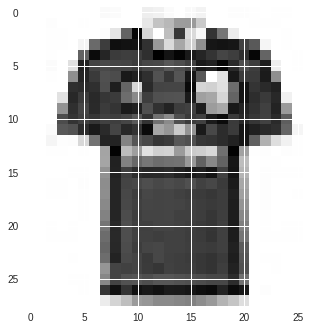

In [0]:
image_index = 0
pred = cnn_classifier.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Label :",pred.argmax(),"\n")
print("Actual Label :",Y_test[image_index],"\n")

print('#'*20,'\n\nIMAGE\n************************************')
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')


**Conclusion**

The CNN was able to attain a 91.34% accuracy on the training sets.

The CNN showed 86.58% accuracy on the testset

## Visualizing the images in grey scale

The MNIST Fashin Dataset is a collection of images belonging to 10 different categories.

However in the dataset the categories are labeles numerically.

Following images  are the gray scale representation of the data from the dataset starting from label 0 to 9


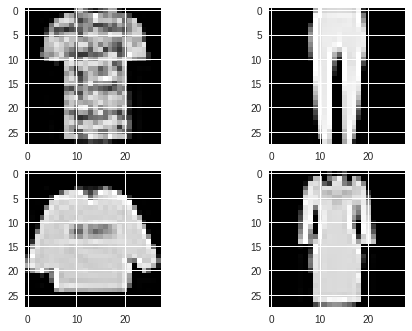

In [0]:
# plot 4 images as gray scale
X_t = X_train.reshape(-1,28,28)

plt.subplot(221)
plt.imshow(X_t[3], cmap=plt.get_cmap('gray'))  #image of label=0 (from row=3 of X_train)

plt.subplot(222)
plt.imshow(X_t[29], cmap=plt.get_cmap('gray')) #image of label=1 (from row=29 of X_train)

plt.subplot(223)
plt.imshow(X_t[0], cmap=plt.get_cmap('gray'))  #image of label=2 (from row=0 of X_train)

plt.subplot(224)
plt.imshow(X_t[4], cmap=plt.get_cmap('gray')) #image of label=3 (from row=4 of X_train)

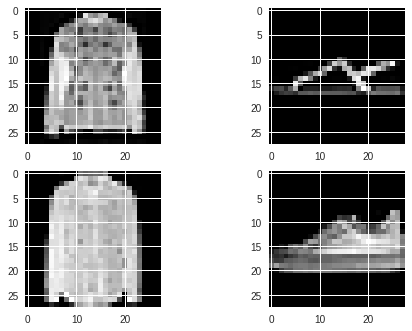

In [0]:
plt.subplot(221)
plt.imshow(X_t[5], cmap=plt.get_cmap('gray')) #image of label=4 (from row=5 of X_train)

plt.subplot(222)
plt.imshow(X_t[7], cmap=plt.get_cmap('gray')) #image of label=5 (from row=7 of X_train)

plt.subplot(223)
plt.imshow(X_t[2], cmap=plt.get_cmap('gray'))  #image of label=6 (from row=2 of X_train)

plt.subplot(224)
plt.imshow(X_t[21], cmap=plt.get_cmap('gray')) #image of label=7 (from row=21 of X_train)


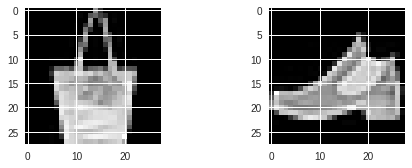

In [0]:
plt.subplot(221)
plt.imshow(X_t[9], cmap=plt.get_cmap('gray')) #image of label=8 (from row=9 of X_train)

plt.subplot(222)
plt.imshow(X_t[1], cmap=plt.get_cmap('gray'))  #image of label=9 (from row=1 of X_train)


**Conclusion**

MNIST Fashion dataset consist of data of 10 fashion items images

